In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [39]:
data= pd.read_csv("C:/Users/Nirmal/Documents/Python Scripts/goldstock.csv")
data

Date   Close  Volume    Open    High     Low
0     19-01-2024  2029.3  166078  2027.4  2041.9  2022.2
1     18-01-2024  2021.6  167013  2009.1  2025.6  2007.7
2     17-01-2024  2006.5  245194  2031.7  2036.1  2004.6
3     16-01-2024  2030.2  277995  2053.4  2062.8  2027.6
4     12-01-2024  2051.6  250946  2033.2  2067.3  2033.1
...          ...     ...     ...     ...     ...     ...
2506  28-01-2014  1250.5   81426  1254.9  1261.9  1248.0
2507  27-01-2014  1263.5   63419  1269.9  1280.1  1252.0
2508  24-01-2014  1264.5   34998  1264.3  1273.2  1256.9
2509  23-01-2014  1262.5   41697  1235.1  1267.1  1230.8
2510  22-01-2014  1238.6   80262  1240.5  1243.5  1235.5

[2511 rows x 6 columns]

In [3]:
data.dtypes

Date       object
Close     float64
Volume      int64
Open      float64
High      float64
Low       float64
dtype: object

In [4]:
data.describe()

Close         Volume         Open         High          Low
count  2511.000000    2511.000000  2511.000000  2511.000000  2511.000000
mean   1498.726085  185970.770609  1498.725528  1508.451454  1488.869932
std     298.824811   97600.769382   299.118187   301.262244   296.417703
min    1049.600000       1.000000  1051.500000  1062.700000  1045.400000
25%    1249.850000  126693.500000  1249.500000  1257.300000  1242.350000
50%    1332.800000  175421.000000  1334.000000  1342.400000  1326.600000
75%    1805.850000  234832.000000  1805.600000  1815.450000  1793.050000
max    2093.100000  787217.000000  2094.400000  2098.200000  2074.600000

In [5]:
data.isnull().sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

In [6]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'], open=data['Open'], high=data['High'], low=data['Low'], close=data['Close'])])

fig.update_layout(xaxis_rangeslider_visible=False, yaxis_title='Price')
fig.show()

In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', ascending=True, inplace=True)
data.set_index('Date', inplace=True)

data['50_SMA'] = data['Close'].rolling(window = 50, min_periods = 1).mean()
# create 50 days simple moving average column
data['200_SMA'] = data['Close'].rolling(window = 200, min_periods = 1).mean()
# display first few rows
data.head()

C:\Users\Nirmal\AppData\Local\Temp\ipykernel_2360\3582153994.py:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



Close  Volume    Open    High     Low    50_SMA   200_SMA
Date                                                                  
2014-01-22  1238.6   80262  1240.5  1243.5  1235.5  1238.600  1238.600
2014-01-23  1262.5   41697  1235.1  1267.1  1230.8  1250.550  1250.550
2014-01-24  1264.5   34998  1264.3  1273.2  1256.9  1255.200  1255.200
2014-01-27  1263.5   63419  1269.9  1280.1  1252.0  1257.275  1257.275
2014-01-28  1250.5   81426  1254.9  1261.9  1248.0  1255.920  1255.920

In [9]:
data['Signal'] = 0.0
data['Signal'] = np.where(data['50_SMA'] > data['200_SMA'], 1.0, 0.0)

In [10]:
data['Position'] = data['Signal'].diff()
# display first few rows
data.head()

Close  Volume    Open    High     Low    50_SMA   200_SMA  \
Date                                                                     
2014-01-22  1238.6   80262  1240.5  1243.5  1235.5  1238.600  1238.600   
2014-01-23  1262.5   41697  1235.1  1267.1  1230.8  1250.550  1250.550   
2014-01-24  1264.5   34998  1264.3  1273.2  1256.9  1255.200  1255.200   
2014-01-27  1263.5   63419  1269.9  1280.1  1252.0  1257.275  1257.275   
2014-01-28  1250.5   81426  1254.9  1261.9  1248.0  1255.920  1255.920   

            Signal  Position  
Date                          
2014-01-22     0.0       NaN  
2014-01-23     0.0       0.0  
2014-01-24     0.0       0.0  
2014-01-27     0.0       0.0  
2014-01-28     0.0       0.0

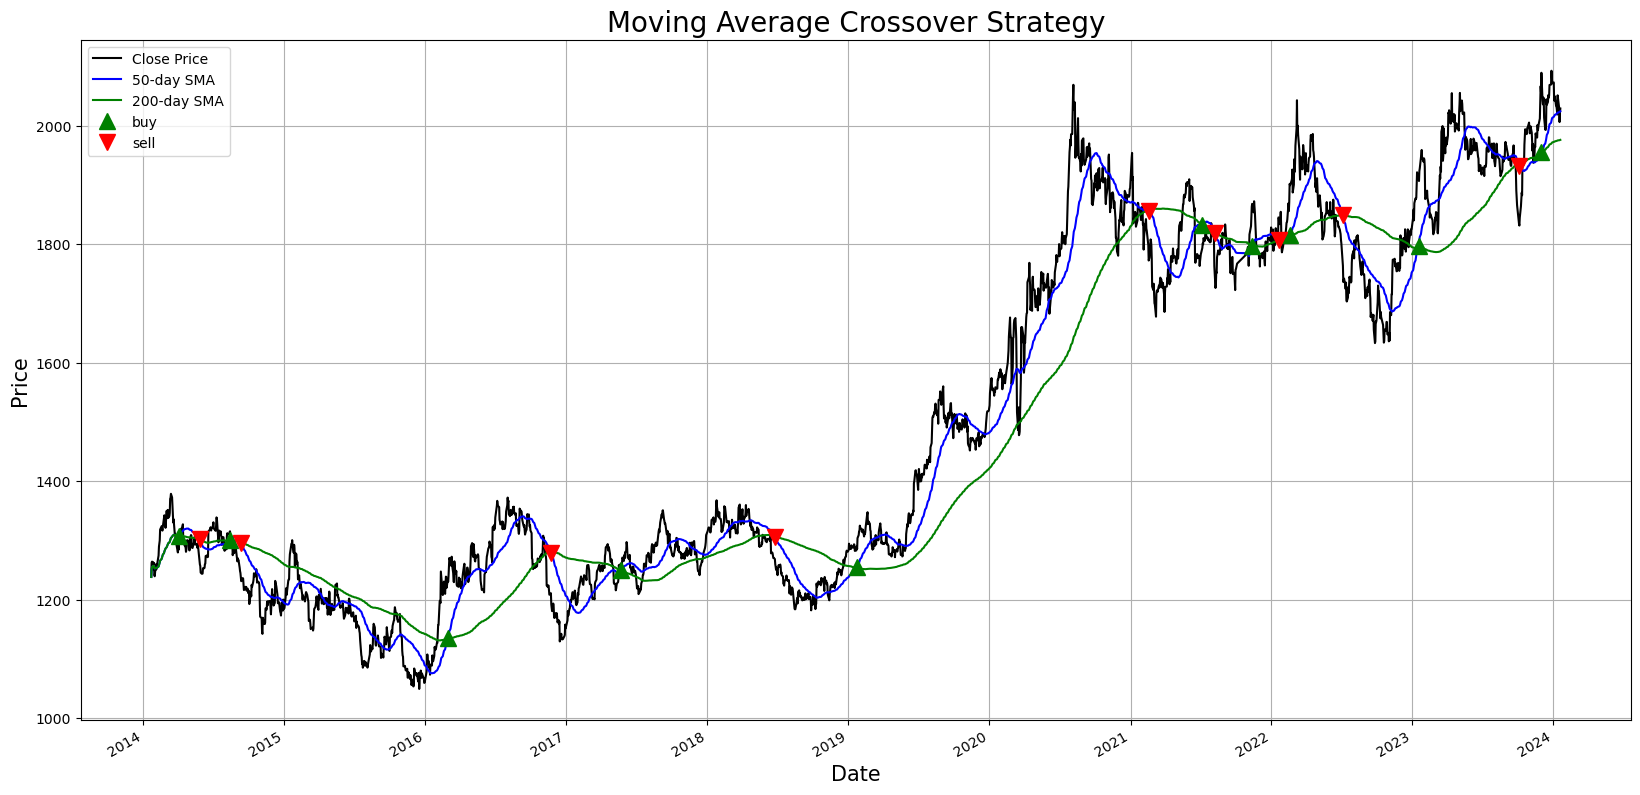

In [11]:
plt.figure(figsize = (20,10))

data['Close'].plot(color = 'k', label= 'Close Price') 
data['50_SMA'].plot(color = 'b',label = '50-day SMA') 
data['200_SMA'].plot(color = 'g', label = '200-day SMA')

plt.plot(data[data['Position'] == 1].index, 
         data['50_SMA'][data['Position'] == 1], 
         '^', markersize = 12, color = 'g', label = 'buy')

plt.plot(data[data['Position'] == -1].index, 
         data['50_SMA'][data['Position'] == -1], 
         'v', markersize = 12, color = 'r', label = 'sell')
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Moving Average Crossover Strategy', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [13]:
period=20

data2= data

data2["Mean_20"] = data2["Close"].rolling(period).mean()
data2["Std"] = data2["Close"].rolling(period).std()

data2["Upper_Bollinger"] = data2["Mean_20"] + (2* data2["Std"])
data2["Lower_Bollinger"] = data2["Mean_20"] - (2* data2["Std"])

data2

Date   Close  Volume    Open    High     Low   Mean_20        Std  \
0     19-01-2024  2029.3  166078  2027.4  2041.9  2022.2       NaN        NaN   
1     18-01-2024  2021.6  167013  2009.1  2025.6  2007.7       NaN        NaN   
2     17-01-2024  2006.5  245194  2031.7  2036.1  2004.6       NaN        NaN   
3     16-01-2024  2030.2  277995  2053.4  2062.8  2027.6       NaN        NaN   
4     12-01-2024  2051.6  250946  2033.2  2067.3  2033.1       NaN        NaN   
...          ...     ...     ...     ...     ...     ...       ...        ...   
2506  28-01-2014  1250.5   81426  1254.9  1261.9  1248.0  1286.365  34.322699   
2507  27-01-2014  1263.5   63419  1269.9  1280.1  1252.0  1282.405  31.969105   
2508  24-01-2014  1264.5   34998  1264.3  1273.2  1256.9  1278.730  29.359946   
2509  23-01-2014  1262.5   41697  1235.1  1267.1  1230.8  1275.675  27.569584   
2510  22-01-2014  1238.6   80262  1240.5  1243.5  1235.5  1271.760  26.960076   

      Upper_Bollinger  Lower_Bollinger  
0                 NaN              NaN  
1                 NaN              NaN  
2                 NaN              NaN  
3                 NaN              NaN  
4                 NaN              NaN  
...               ...              ...  
2506      1355.010398      1217.719602  
2507      1346.343209      1218.466791  
2508      1337.449892      1220.010108  
2509      1330.814168      1220.535832  
2510      1325.680151      1217.839849  

[2511 rows x 10 columns]

In [14]:
delta = data2['Close'].diff() 
gain = delta.where(delta > 0, 0) 
loss = -delta.where(delta < 0, 0) 
 
average_gain = gain.rolling(window=14, min_periods=1).mean() 
average_loss = loss.rolling(window=14, min_periods=1).mean() 
 
rs = average_gain / average_loss.abs() 
rsi = 100 - (100 / (1 + rs)) 
data2['RSI'] = rsi.round(1)

C:\Users\Nirmal\AppData\Local\Temp\ipykernel_2360\3913877718.py:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



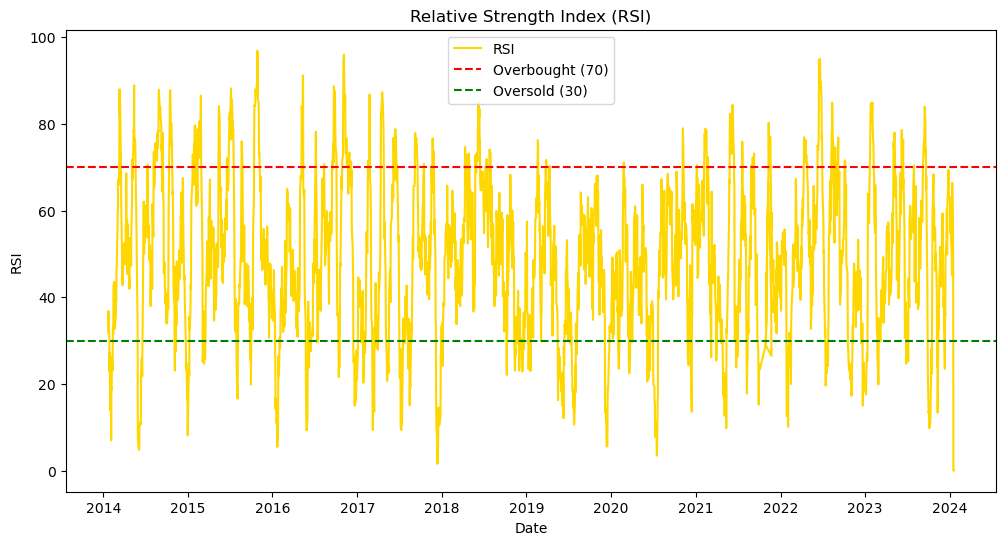

In [15]:
data2['Date'] = pd.to_datetime(data2['Date'])
data.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(data2.index, data2['RSI'], color='gold', label='RSI')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

In [16]:
# Buy Signal
data2["Signal"] = np.where(((data2["RSI"] < 30) & (data2["Close"] < data2["Lower_Bollinger"])), 1, np.nan)

# Sell Signal
data2["Signal"] = np.where(((data2["RSI"] > 70) & (data2["Close"] > data2["Upper_Bollinger"])), -1, data2["Signal"])

data2["Signal"] = data2["Signal"].shift()
data2["Signal"] = data2["Signal"].fillna(0)

data2

Close  Volume    Open    High     Low   Mean_20        Std  \
Date                                                                      
2024-01-19  2029.3  166078  2027.4  2041.9  2022.2       NaN        NaN   
2024-01-18  2021.6  167013  2009.1  2025.6  2007.7       NaN        NaN   
2024-01-17  2006.5  245194  2031.7  2036.1  2004.6       NaN        NaN   
2024-01-16  2030.2  277995  2053.4  2062.8  2027.6       NaN        NaN   
2024-01-12  2051.6  250946  2033.2  2067.3  2033.1       NaN        NaN   
...            ...     ...     ...     ...     ...       ...        ...   
2014-01-28  1250.5   81426  1254.9  1261.9  1248.0  1286.365  34.322699   
2014-01-27  1263.5   63419  1269.9  1280.1  1252.0  1282.405  31.969105   
2014-01-24  1264.5   34998  1264.3  1273.2  1256.9  1278.730  29.359946   
2014-01-23  1262.5   41697  1235.1  1267.1  1230.8  1275.675  27.569584   
2014-01-22  1238.6   80262  1240.5  1243.5  1235.5  1271.760  26.960076   

            Upper_Bollinger  Lower_Bollinger   RSI  Signal  
Date                                                        
2024-01-19              NaN              NaN   NaN     0.0  
2024-01-18              NaN              NaN   0.0     0.0  
2024-01-17              NaN              NaN   0.0     0.0  
2024-01-16              NaN              NaN  51.0     0.0  
2024-01-12              NaN              NaN  66.4     0.0  
...                     ...              ...   ...     ...  
2014-01-28      1355.010398      1217.719602  22.9     0.0  
2014-01-27      1346.343209      1218.466791  30.8     0.0  
2014-01-24      1337.449892      1220.010108  35.9     0.0  
2014-01-23      1330.814168      1220.535832  36.8     0.0  
2014-01-22      1325.680151      1217.839849  31.9     0.0  

[2511 rows x 11 columns]

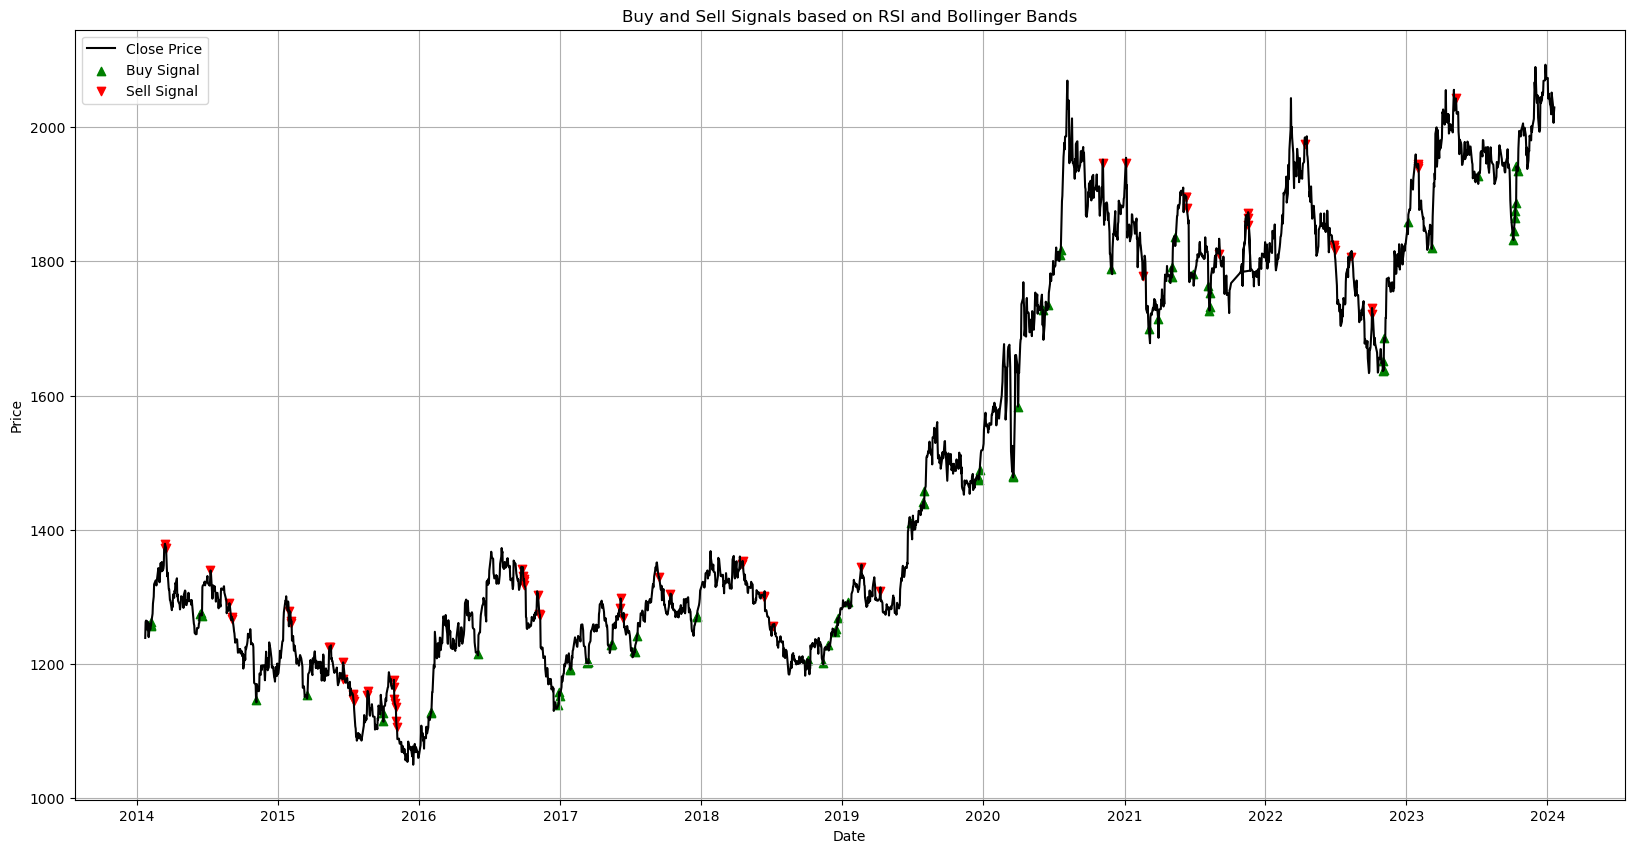

In [17]:
plt.figure(figsize=(20, 10))
plt.plot(data2.index, data2['Close'], label='Close Price', color='black')

# Plotting buy signals as green upward arrows
plt.scatter(data2[data2['Signal'] == 1].index, 
            data2[data2['Signal'] == 1]['Close'], 
            marker='^', color='g', label='Buy Signal')

# Plotting sell signals as red downward arrows
plt.scatter(data2[data2['Signal'] == -1].index, 
            data2[data2['Signal'] == -1]['Close'], 
            marker='v', color='r', label='Sell Signal')

plt.title('Buy and Sell Signals based on RSI and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Nirmal\AppData\Local\Temp\ipykernel_2360\1773669338.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




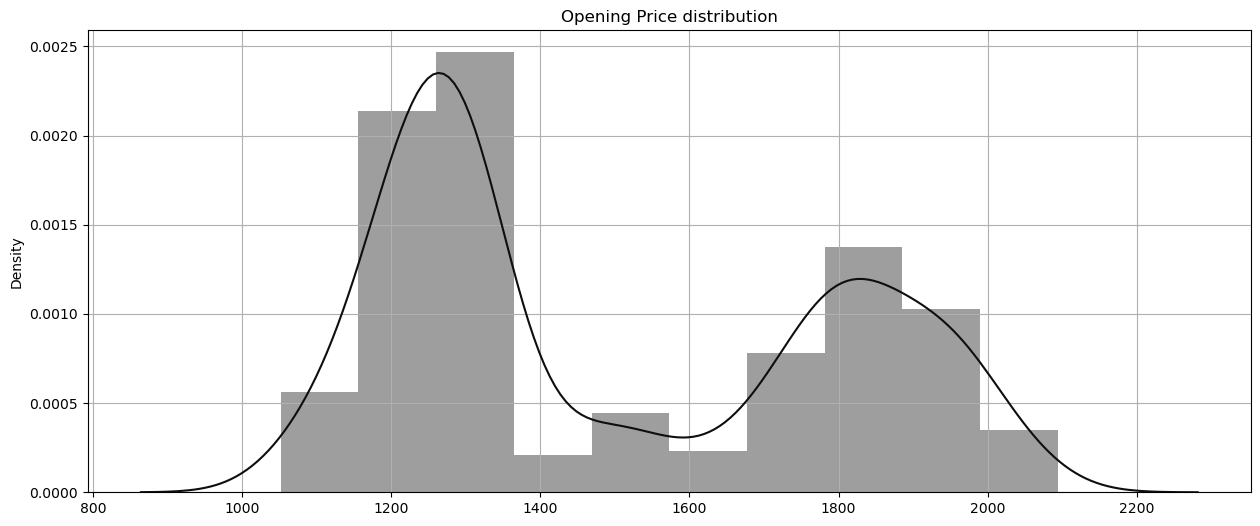

In [19]:
fig, axes = plt.subplots(1, figsize = (15, 6))

sns.distplot(ax = axes, x = data["Open"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#0E0E0D").set(title = "Opening Price distribution")
axes.grid(True)

C:\Users\Nirmal\AppData\Local\Temp\ipykernel_2360\1203124535.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Nirmal\AppData\Local\Temp\ipykernel_2360\1203124535.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




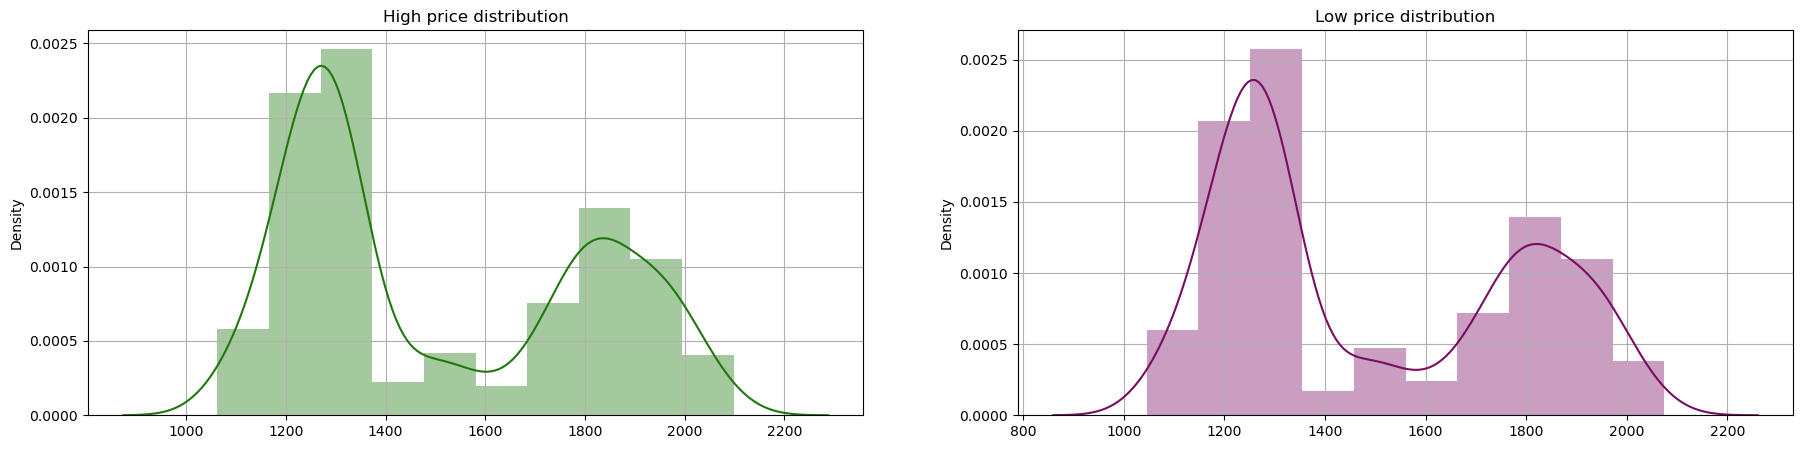

In [23]:
fig, axes = plt.subplots(1,2, figsize = (22, 5))

sns.distplot(ax = axes[0], x = data["High"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#1F780D").set(title = "High price distribution");
axes[0].grid(True)

sns.distplot(ax = axes[1], x = data["Low"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#780D62").set(title = "Low price distribution");
axes[1].grid(True)

C:\Users\Nirmal\AppData\Local\Temp\ipykernel_2360\2053296971.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




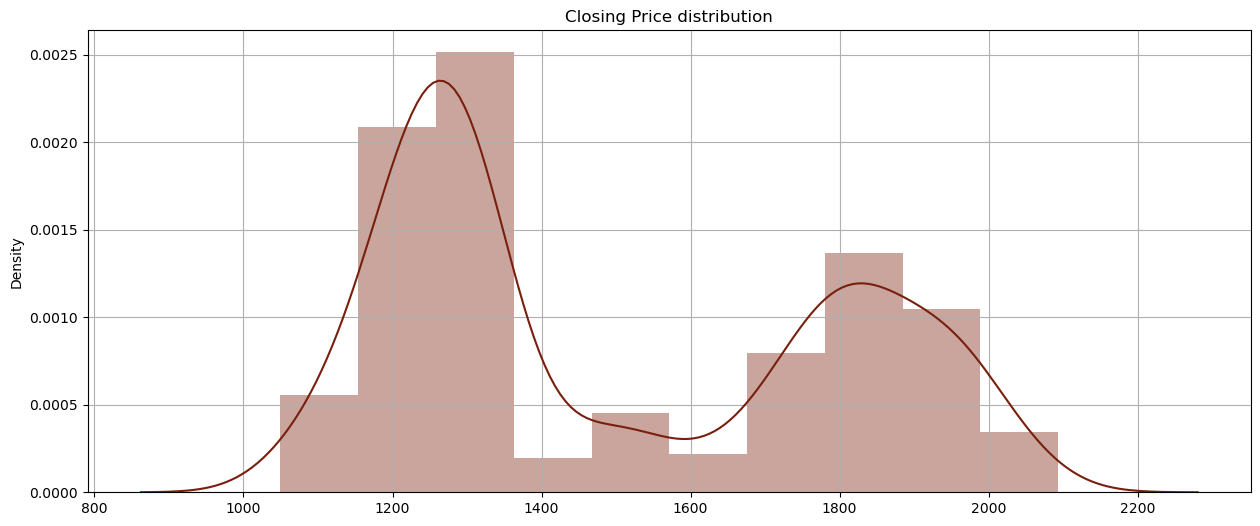

In [24]:
fig, axes = plt.subplots(1, figsize = (15, 6))

sns.distplot(ax = axes, x = data["Close"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#781F0D").set(title = "Closing Price distribution")
axes.grid(True)

C:\Users\Nirmal\AppData\Local\Temp\ipykernel_2360\3382166529.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




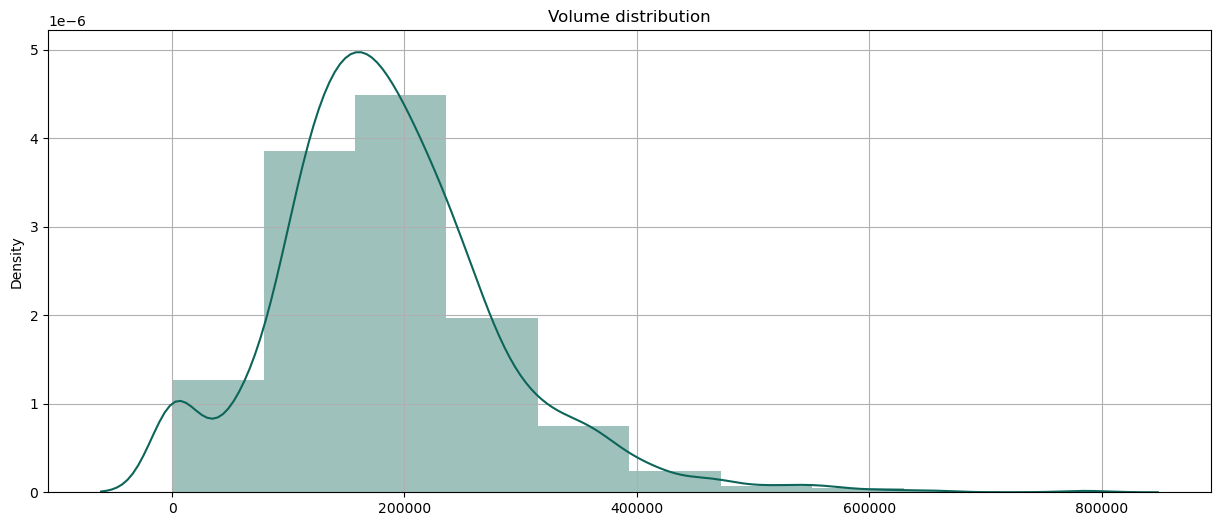

In [25]:
fig, axes = plt.subplots(1, figsize = (15, 6))

sns.distplot(ax = axes, x = data["Volume"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#0D6559").set(title = "Volume distribution")
axes.grid(True)

In [26]:
corr_data= data.drop(["Date"], axis=1)
corr = corr_data.corr()
corr.style.background_gradient(cmap = "copper")

In [28]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', ascending=True, inplace=True)
data.set_index('Date', inplace=True)

C:\Users\Nirmal\AppData\Local\Temp\ipykernel_2360\721079779.py:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



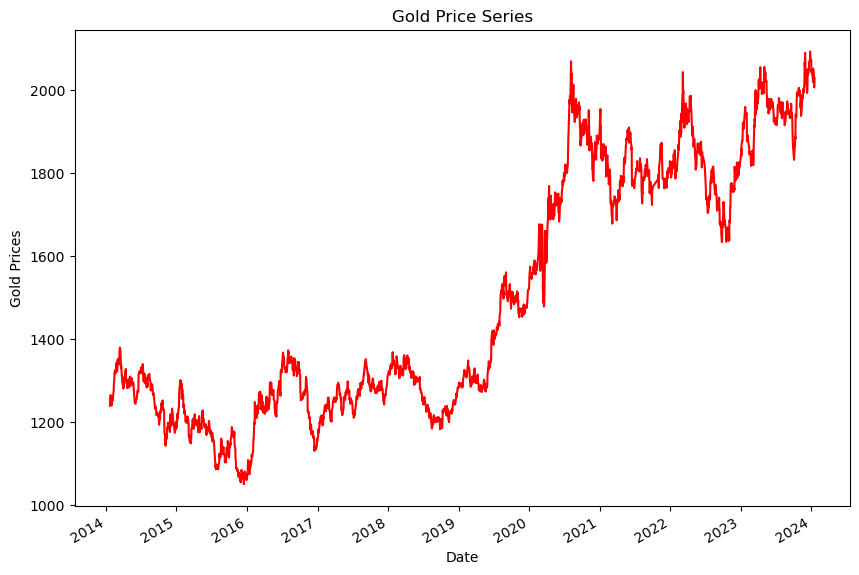

In [29]:
data.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("Gold Prices")
plt.title("Gold Price Series")
plt.show()

In [30]:
data['S_5'] = data['Close'].rolling(window=5).mean()
data['S_10'] = data['Close'].rolling(window=10).mean()
data['Next_Day_Price'] = data['Close'].shift(-1)
data

Close  Volume    Open    High     Low      S_5     S_10  \
Date                                                                   
2014-01-22  1238.6   80262  1240.5  1243.5  1235.5      NaN      NaN   
2014-01-23  1262.5   41697  1235.1  1267.1  1230.8      NaN      NaN   
2014-01-24  1264.5   34998  1264.3  1273.2  1256.9      NaN      NaN   
2014-01-27  1263.5   63419  1269.9  1280.1  1252.0      NaN      NaN   
2014-01-28  1250.5   81426  1254.9  1261.9  1248.0  1255.92      NaN   
...            ...     ...     ...     ...     ...      ...      ...   
2024-01-12  2051.6  250946  2033.2  2067.3  2033.1  2033.02  2045.29   
2024-01-16  2030.2  277995  2053.4  2062.8  2027.6  2032.36  2041.13   
2024-01-17  2006.5  245194  2031.7  2036.1  2004.6  2027.06  2034.44   
2024-01-18  2021.6  167013  2009.1  2025.6  2007.7  2025.82  2032.32   
2024-01-19  2029.3  166078  2027.4  2041.9  2022.2  2027.84  2030.25   

            Next_Day_Price  
Date                        
2014-01-22          1262.5  
2014-01-23          1264.5  
2014-01-24          1263.5  
2014-01-27          1250.5  
2014-01-28          1262.2  
...                    ...  
2024-01-12          2030.2  
2024-01-16          2006.5  
2024-01-17          2021.6  
2024-01-18          2029.3  
2024-01-19             NaN  

[2511 rows x 8 columns]

In [31]:
data["S_5"] = data['S_5'].fillna(data['S_5'].mean()) 
data["S_10"] = data['S_10'].fillna(data['S_10'].mean()) 
data["Next_Day_Price"] = data['Next_Day_Price'].fillna(data['Next_Day_Price'].mean()) 

In [32]:
X = data[['S_5', 'S_10']]
y = data['Next_Day_Price']

In [33]:
t= 0.8
t = int(t*len(data))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

In [34]:
linear = LinearRegression().fit(X_train, y_train)
print("Linear Regression model")
print("Gold ETF Price (y) = %.2f * 5 Days Moving Average (x1) \
+ %.2f * 10 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Linear Regression model
Gold ETF Price (y) = 1.18 * 5 Days Moving Average (x1) + -0.18 * 10 Days Moving Average (x2) + 3.06 (constant)


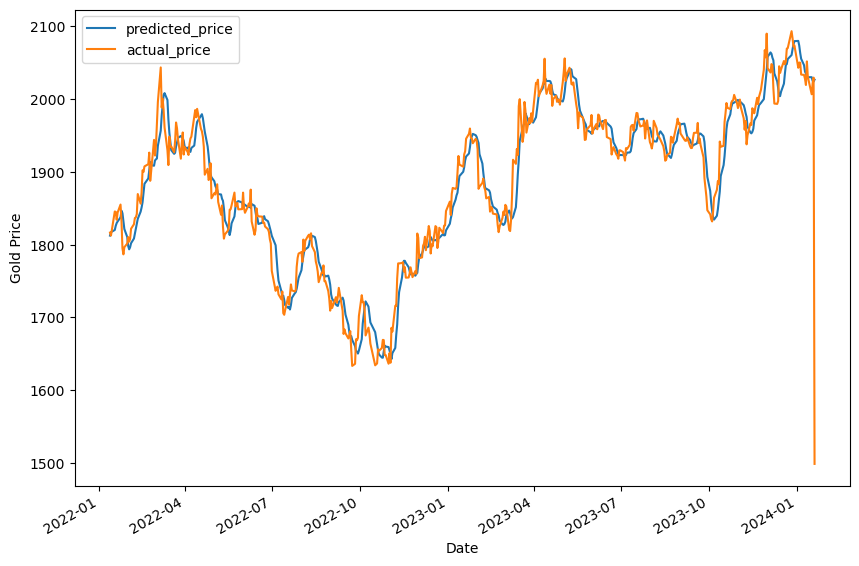

In [35]:
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['Close'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Price")
plt.show()

In [36]:
r2_score = linear.score(X[t:], y[t:])*100
float("{0:.2f}".format(r2_score))

90.39

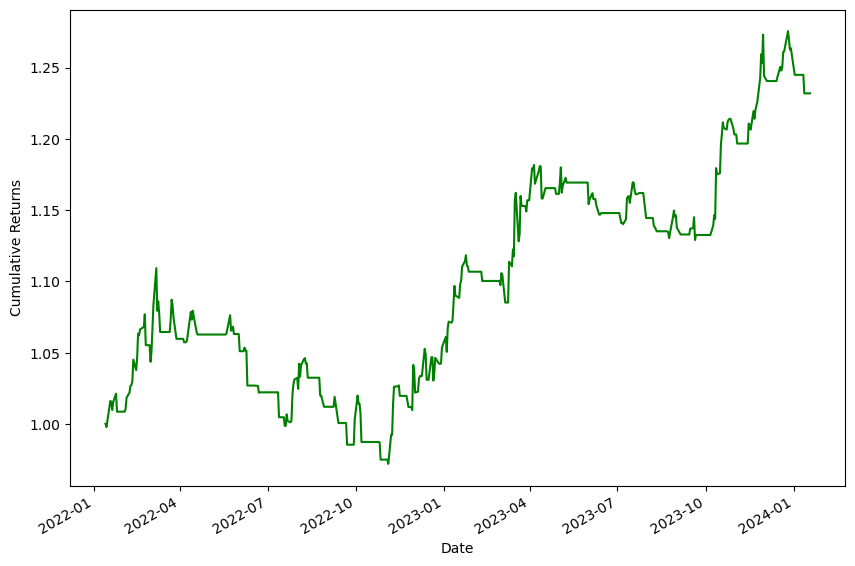

In [37]:
gold = pd.DataFrame()

gold['price'] = data[t:]['Close']
gold['predicted_price_next_day'] = predicted_price
gold['actual_price_next_day'] = y_test
gold['gold_returns'] = gold['price'].pct_change().shift(-1)

gold['signal'] = np.where(gold.predicted_price_next_day.shift(1) < gold.predicted_price_next_day,1,0)

gold['strategy_returns'] = gold.signal * gold['gold_returns']
((gold['strategy_returns']+1).cumprod()).plot(figsize=(10,7),color='g')
plt.ylabel('Cumulative Returns')
plt.show()

In [38]:
sharpe = gold['strategy_returns'].mean()/gold['strategy_returns'].std()*(252**0.5)
'Sharpe Ratio %.2f' % (sharpe)

'Sharpe Ratio 1.00'

In [40]:
time_data = data[['Date','Close']]
time_data['Date'] = pd.to_datetime(time_data['Date'])
time_data.sort_values(by='Date', ascending=True, inplace=True)
time_data.columns = ['ds','y']
time_data.head()

C:\Users\Nirmal\AppData\Local\Temp\ipykernel_2360\2536560690.py:2: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

C:\Users\Nirmal\AppData\Local\Temp\ipykernel_2360\2536560690.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nirmal\AppData\Local\Temp\ipykernel_2360\2536560690.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ds       y
2510 2014-01-22  1238.6
2509 2014-01-23  1262.5
2508 2014-01-24  1264.5
2507 2014-01-27  1263.5
2506 2014-01-28  1250.5

In [41]:
m = Prophet(daily_seasonality=True)
model_fit = m.fit(time_data)

16:19:22 - cmdstanpy - INFO - Chain [1] start processing
16:19:24 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
forecast = model_fit.predict(time_data)
forecast[['ds','yhat','yhat_upper','yhat_lower']].tail()

ds         yhat   yhat_upper   yhat_lower
2506 2024-01-12  1992.790260  2061.596219  1920.897062
2507 2024-01-16  1995.591073  2065.791978  1929.126088
2508 2024-01-17  1995.712955  2065.903882  1925.091049
2509 2024-01-18  1997.355184  2067.519153  1927.306531
2510 2024-01-19  1997.537569  2063.664770  1931.183777

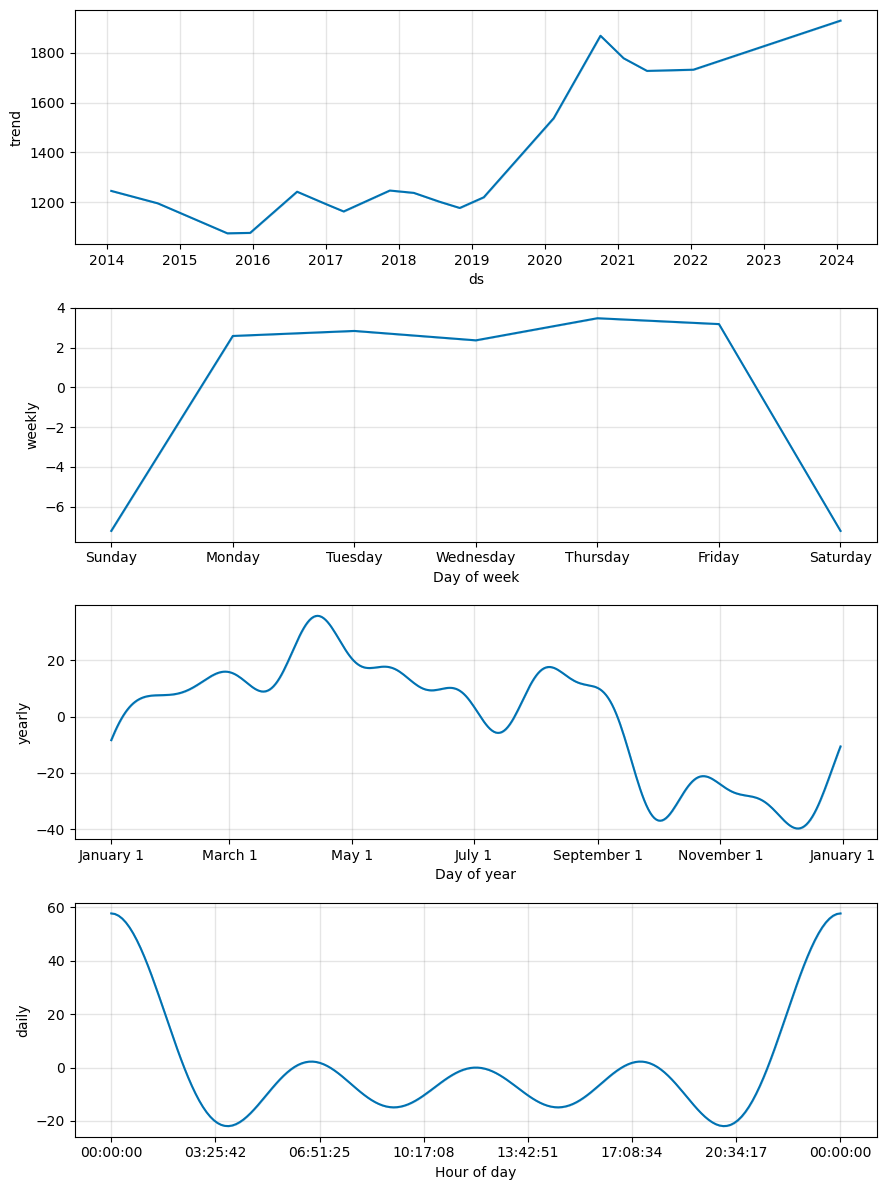

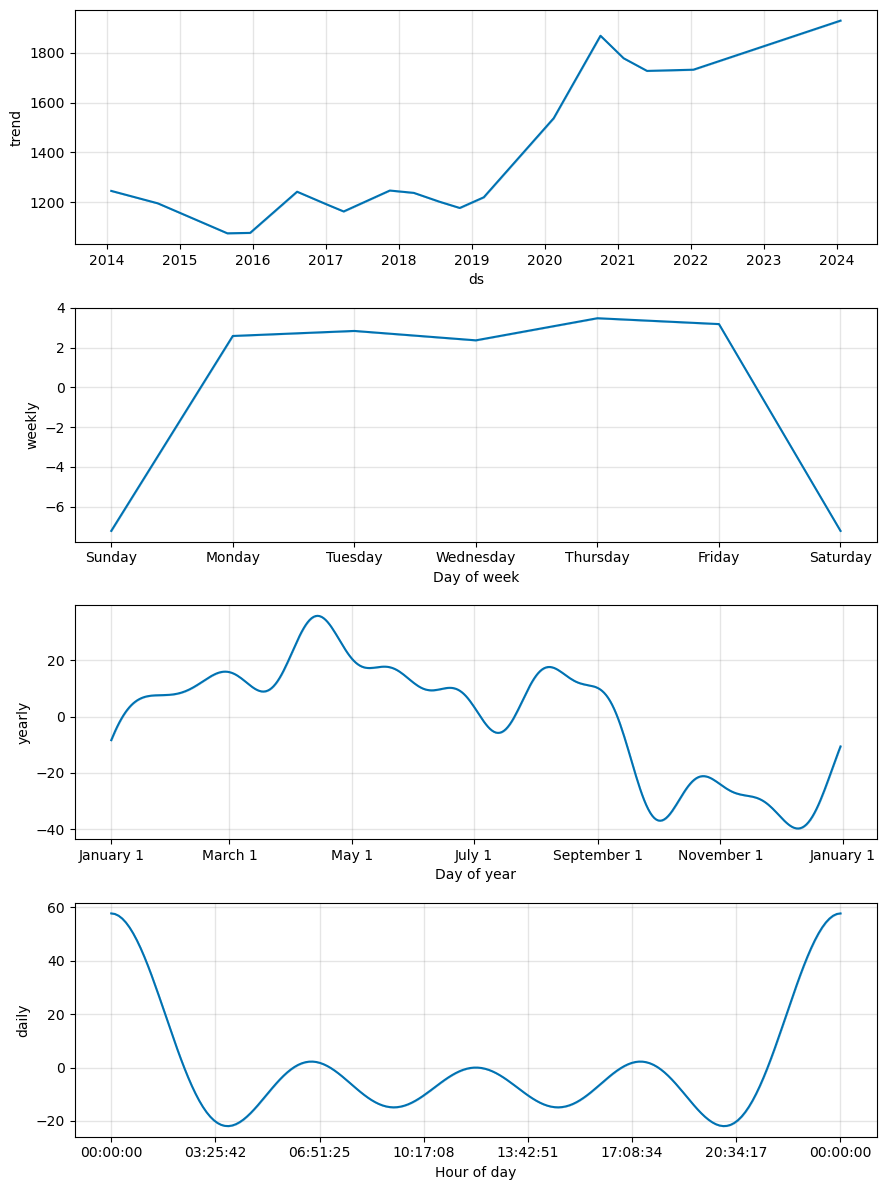

In [43]:
model_fit.plot_components(forecast)

In [44]:
m2 = Prophet(daily_seasonality=True)
model2_fit= m2.fit(time_data)
future = m2.make_future_dataframe(periods = 336)
future.tail(10)

16:19:29 - cmdstanpy - INFO - Chain [1] start processing
16:19:30 - cmdstanpy - INFO - Chain [1] done processing


ds
2819 2024-12-11
2820 2024-12-12
2821 2024-12-13
2822 2024-12-14
2823 2024-12-15
2824 2024-12-16
2825 2024-12-17
2826 2024-12-18
2827 2024-12-19
2828 2024-12-20

In [45]:
forecast2 = m2.predict(future)
forecast2[['ds','yhat','yhat_upper','yhat_lower']].tail()

ds         yhat   yhat_upper   yhat_lower
2824 2024-12-16  2042.425503  2200.664743  1867.106966
2825 2024-12-17  2044.087881  2204.601995  1865.044904
2826 2024-12-18  2045.175368  2197.863006  1874.739113
2827 2024-12-19  2047.985061  2202.785062  1879.100237
2828 2024-12-20  2049.516701  2211.866256  1867.178829

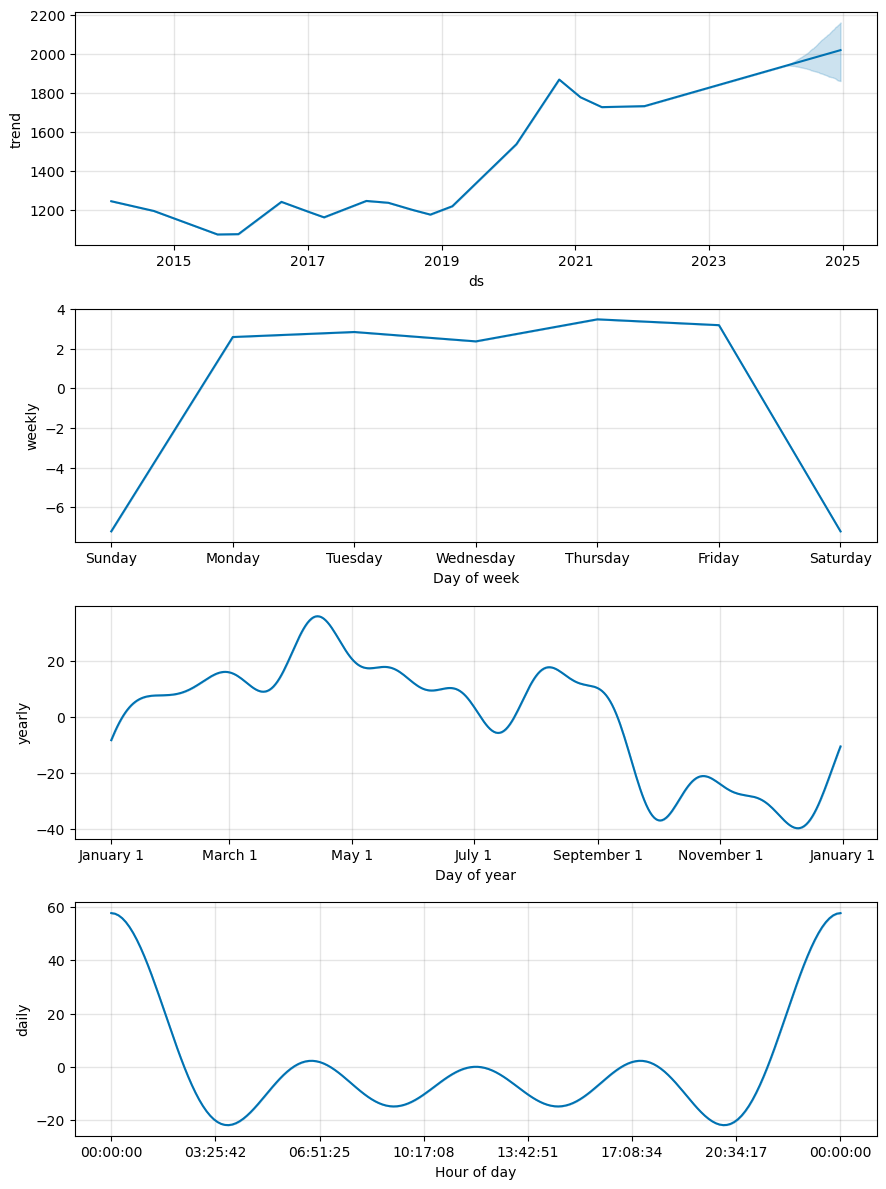

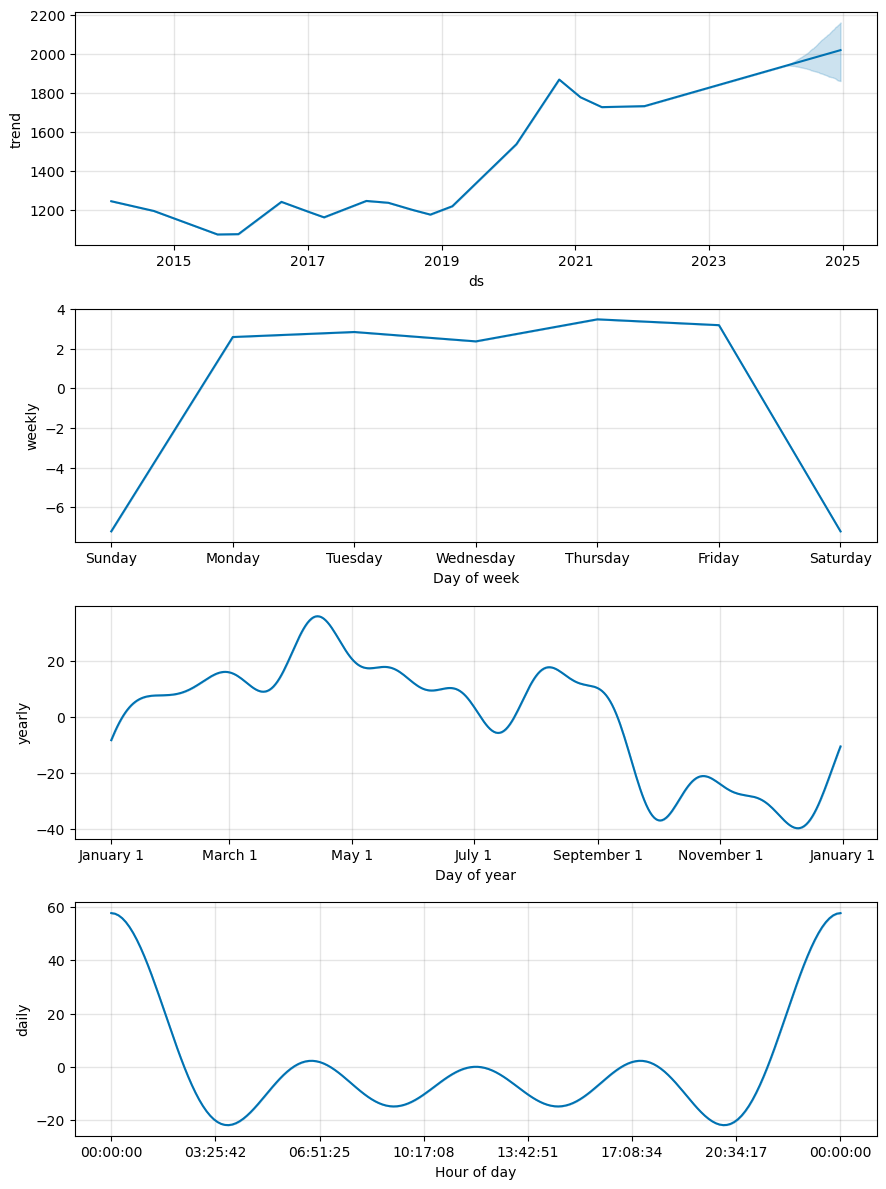

In [46]:
model2_fit.plot_components(forecast2)

In [47]:
predictions = forecast2[['ds','yhat']]
predictions = predictions.rename(columns = {'ds':'Date','yhat':'Close'})
predictions.head()

Date        Close
0 2014-01-22  1312.989862
1 2014-01-23  1313.936428
2 2014-01-24  1313.461247
3 2014-01-27  1312.275979
4 2014-01-28  1312.335579

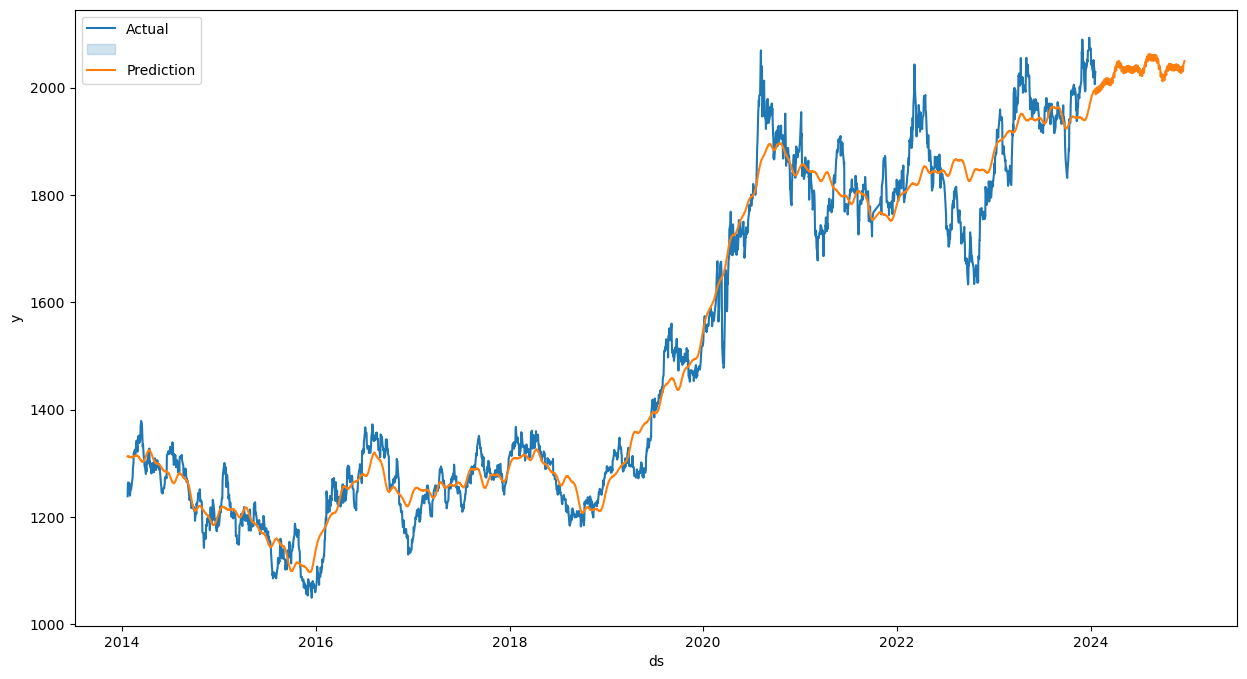

In [48]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=time_data, x='ds', y='y', label='Actual')
sns.lineplot(predictions,x = 'Date',y = 'Close',legend='full')
plt.legend(labels = ['Actual',"",'Prediction'])
plt.show()

In [49]:
predictions['Date'] = pd.to_datetime(predictions['Date'])
predictions['Year'] = predictions['Date'].dt.year
predictions['Month'] = predictions['Date'].dt.month
predictions['Week'] = predictions['Date'].dt.isocalendar().week
predictions['Day'] = predictions['Date'].dt.day

In [50]:
x_time  = predictions.drop(columns=['Date','Close'])
y_time = predictions[['Close']]

In [51]:
X_time_train,X_time_test,y_time_train,y_time_test = train_test_split(x_time,y_time,test_size=0.2,random_state=99)

In [52]:
rfr_time_model = RandomForestRegressor()
rfr_time_model.fit(X_time_train,y_time_train)
rfr_time_pred = rfr_time_model.predict(X_time_test)

C:\Users\Nirmal\AppData\Local\Temp\ipykernel_2360\1708975205.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [53]:
mse = mean_squared_error(y_time_test,rfr_time_pred)
rmse = np.sqrt(mse)

In [54]:
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  5.1913694868409666
Root Mean Squared Error:  2.2784576991554983
